In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
sns.set_context('poster', font_scale=1.25)

We are solving

$$\frac{df}{dt}=-(\vec{v}\cdot \nabla)f + D \nabla^2 f + sf(1-f)$$

in two dimensions.

In [5]:
from adr_2d.solver import Solver

In [6]:
import skimage as ski
import skimage.io

In [7]:
import time

In [8]:
sol = Solver(imax=100, jmax=100, kmax=1000, use_morton=False)

Creating initial gaussian condition...
Done!
Creating advection operator...


ValueError: Buffer dtype mismatch, expected 'int' but got 'long'

In [9]:
np.int32

int

It takes *soooooo* long to make these operators...bleh. Let's see if we can speed it up...if we want to do it right, we really have to initialize the elements in a more intelligent manner...

In [60]:
sol.kmax = 500

In [61]:
result = sol.run()

I'm so confused. Why does this start sucking.

In [62]:
crap = np.where(result < 0)

In [63]:
ruh_roh_1 = crap[0]

Ok yeah there are problems lol.

In [64]:
ruh_rohs = np.where(result < 0)[0]

In [65]:
result.min()

-0.08027732230417467

Interesting. So instabilities are certainly growing...but not exploding...maybe it is an instability. Maybe I need more grid points???

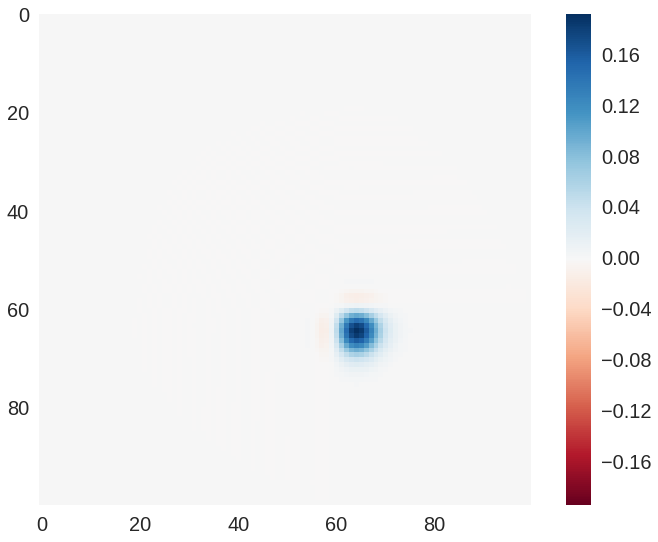

In [66]:
ski.io.imshow(result[:, :, 300])
plt.grid(False)
#plt.clim([-.1, 0])

wtf lol. It's more important that I debug this error first...why are things no longer looping appropriately as well?

Somehow, advection is screwing things up. Because diffusion looks beautiful.